In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot
import cv2

Using TensorFlow backend.


In [2]:
train = []
train_name = []
    
for i in range(1,16):
    img = cv2.imread('./hand_writing/train/circle/circle0' + '%02d'%i + '.png', 0)
    train.append(img)
    train_name.append(0)
    
for i in range(1,16):
    img = cv2.imread('./hand_writing/train/rectangle/rectangle0' + '%02d'%i + '.png', 0)
    train.append(img)
    train_name.append(1)
    
for i in range(1,16):
    img = cv2.imread('./hand_writing/train/triangle/triangle0' + '%02d'%i + '.png', 0)
    train.append(img)
    train_name.append(2)

In [3]:
test = []
test_name = []

for i in range(1,6):
    img = cv2.imread('./hand_writing/test_easy/circle/circle0' + '%02d'%(i+15) + '.png', 0)
    test.append(img)
    test_name.append(0)
    
for i in range(1,6):
    img = cv2.imread('./hand_writing/test_easy/rectangle/rectangle0' + '%02d'%(i+15) + '.png', 0)
    test.append(img)
    test_name.append(1)
    
for i in range(1,6):
    img = cv2.imread('./hand_writing/test_easy/triangle/triangle0' + '%02d'%(i+15) + '.png', 0)
    test.append(img)
    test_name.append(2)

In [4]:
X_train = np.array(train)
X_test = np.array(test)
y_train = np.array(train_name)
y_test = np.array(test_name)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)) 
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)) 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


In [22]:
model = Sequential()

model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                 filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))

model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                 filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

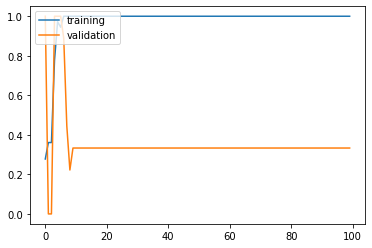

15/15 [==============================] - 0s 998us/step
Test accuracy:  0.6666666865348816


In [6]:
history = model.fit(X_train, y_train, batch_size = 15, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

In [23]:
print(model.layers[0].name)
print(model.layers[0].trainable) #전이학습을 사용할때, 해당 과정을 학습할지 안할지 정해줄 수 있음.
print(model.layers[0].output) # w, b가 적용된 결과값


w=model.layers[0].get_weights()
print(w[0].shape)  # w
print(w[1].shape)  # b

print(w[0][:,:,0,0]) #필터
print(w[0][:,:,0,1]) #필터
print(w[1][0]) #필터 1의 b
print(w[1][1]) #필터 2의 b, 근데 왜 0이지?

conv2d_5
True
Tensor("conv2d_5/BiasAdd:0", shape=(?, 24, 24, 32), dtype=float32)
(3, 3, 1, 32)
(32,)
[[-0.04140413  0.03423628  0.04077579]
 [-0.12547721 -0.10494713  0.05315088]
 [ 0.0032791   0.04478249 -0.0049223 ]]
[[ 0.04455315  0.07524973  0.04203565]
 [-0.05714416  0.00143255  0.0905211 ]
 [ 0.08979702  0.14207397 -0.04046911]]
0.0
0.0


(15, 24, 24, 32)


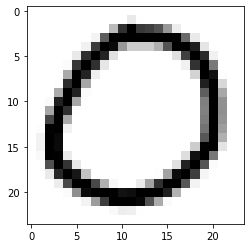

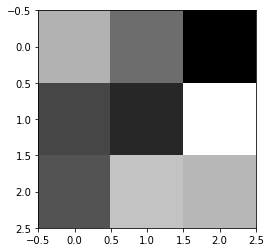

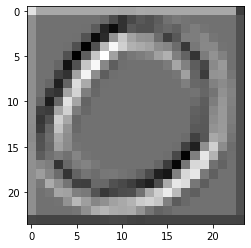

In [24]:
from keras.models import Model

my_layer_model = Model(inputs=model.input, outputs=model.layers[0].output)
output = my_layer_model.predict(X_test)

print(output.shape)

filter_num = 5
img_num = 1

# 원본 이미지
plt.imshow(X_test[img_num,:,:,0], cmap='gray') #1번째 이미지, [인덱스, 가로, 세로, 채널(흑백:0)]
plt.show()

# 필터
w=model.layers[0].get_weights()
w=w[0]
f=w[:,:,0,filter_num] #[가로, 세로, 채널, 필터넘버]
plt.imshow(f, cmap='gray')
plt.show()

# 출력 : 1번째 이미지 * (5번째 필터 + b)
plt.imshow(output[img_num,:,:,filter_num], cmap='gray') 
plt.show()